In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dfx=pd.read_csv("C:\\Users\\KIIT\\Desktop\\coding blocks\\knn/Diabetes_XTrain.csv")
dfy=pd.read_csv("C:\\Users\\KIIT\\Desktop\\coding blocks\\knn/Diabetes_YTrain.csv")
dftest=pd.read_csv("C:\\Users\\KIIT\\Desktop\\coding blocks\\knn/Diabetes_Xtest.csv")

In [3]:
test=dftest.values
X=dfx.values
Y=dfy.values

In [4]:
print(X.shape,Y.shape)

(576, 8) (576, 1)


In [5]:
Y=Y.reshape((-1,))

In [6]:
print(Y)

[1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1
 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1
 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0
 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0
 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0
 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1
 0 1 1 0 0 0 0 0 1 1 0 0 

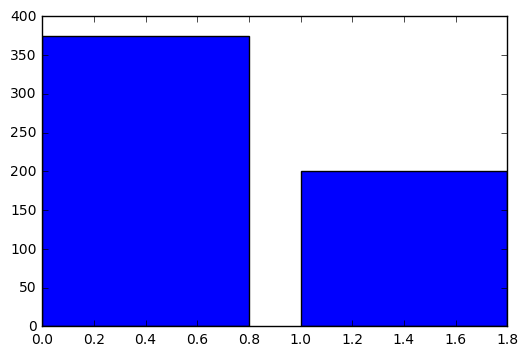

In [7]:
xlist,ylist = np.unique(Y, return_counts = True)
plt.bar(xlist,ylist)
plt.show()

In [8]:
dfx.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,3.758681,119.975694,68.826389,20.364583,76.166667,31.857292,0.481519,32.954861
std,3.328783,31.512914,20.285812,15.893856,109.193550,8.134926,0.336910,11.878137
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,26.975000,0.247750,24.000000
50%,3.000000,116.000000,72.000000,22.000000,36.000000,32.000000,0.381500,29.000000
75%,6.000000,139.000000,80.000000,32.000000,120.000000,36.725000,0.641250,40.000000
max,17.000000,199.000000,122.000000,63.000000,744.000000,67.100000,2.420000,81.000000


In [9]:
dfx.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23
5,7,100,0,0,0,30.0,0.484,32
6,4,110,66,0,0,31.9,0.471,29
7,1,111,86,19,0,30.1,0.143,23
8,3,169,74,19,125,29.9,0.268,31
9,1,71,62,0,0,21.8,0.416,26


In [10]:
dfy.head(15)

,Outcome
0,1
1,0
2,1
3,1
4,0
5,1
6,0
7,0
8,1
9,0


In [11]:
def dist(X1,X2):
    return np.sqrt((sum(X1-X2)**2))
def knn(X,Y,querypoint,k=25):
    values=[]
    for i in range(X.shape[0]):
        val=dist(querypoint,X[i])
        values.append((val,Y[i]))
    values=sorted(values)
    values=values[:k]
    values=np.array(values)
    new_values=np.unique(values[:,1],return_counts=True)
    max_freq=np.argmax(new_values[1])
    pred=new_values[0][max_freq]
    return(pred)

#for i in range(0,192):
    #lis=[]
    #Test=dftest.values
    #lis.append(knn(X,Y,Test[i]))
    
#diabetes={
#   "Outcome":np.asarray(lis)
#}

#df=pd.DataFrame(diabetes,dtype='int32')
#df.to_csv("Solution.csv",index=False)
k=test.shape[0]
#print(k)
#k=int(k)
ans=np.full((192,1),0)
for i in range(k):
    a=knn(X,Y,test[i])
    ans[i][0]=a

#print(ans)    
ans=pd.DataFrame(ans,columns=['Outcome'])
ans.head()
ans=ans.to_csv('Diabetes.csv',index=False)

In [12]:

#df.to_csv("Solution.csv",index=False)

In [13]:

#df=pd.DataFrame(diabete,dtype='int32')

In [14]:
#print(df)